In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


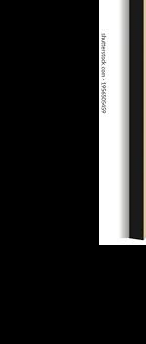

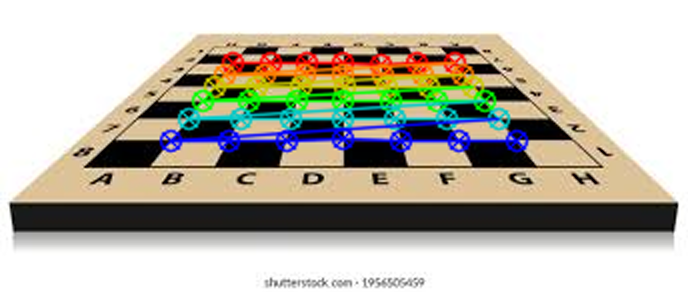

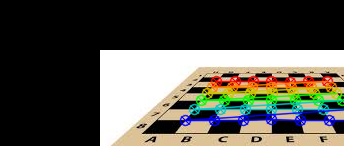

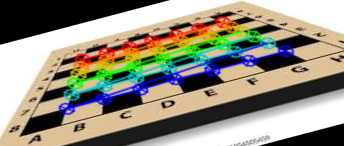

Camera matrix:
 [[9.64658730e+03 0.00000000e+00 1.07515472e+02]
 [0.00000000e+00 1.07498805e+03 2.20390116e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[-2.53857923e+01  1.01920826e+02 -1.11334411e+00  4.17154456e-02
   4.67601679e+02]]


In [52]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/CV/Chess/*.jpeg') #Uses glob to load all .jpg files from the specified directory

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #looks for the 7×6 inner corners on the checkerboard.

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (7,6), corners, ret)
        rows,cols,_ = img.shape

        # ROTATION
        # Rotate the image 90 degrees counter-clockwise
        M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),-90,1)
        dst = cv2.warpAffine(img,M,(rows,cols))
        cv2_imshow(dst)

        # SCALING
        res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
        height, width = img.shape[:2]
        res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        cv2_imshow(res)

        #TRANSLATION
        M = np.float32([[1,0,100],[0,1,50]])
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2_imshow(dst)

        #AFFINE TRANSLATION
        pts1 = np.float32([[50,50],[200,50],[50,200]])
        pts2 = np.float32([[10,100],[200,50],[100,250]])
        M = cv2.getAffineTransform(pts1,pts2)
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2_imshow(dst) # Use cv2_imshow instead of cv2.imshow
        # cv2.waitKey(100) # waitKey is not needed with cv2_imshow

# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)